# Experiment-08

Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering.

The Expectation-Maximization (EM) ia an iterative algorithm for solving maximum likelihood problems, particularly in cases where there are missing or latent variables in the model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.metrics as sm


In [ ]:
# Load iris dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
X

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
# Get the predicted clusters
y_kmeans = kmeans.predict(X)

Text(0, 0.5, 'Petal Width')

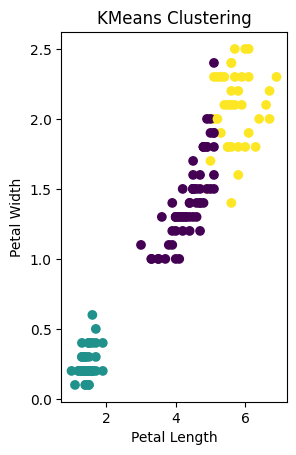

In [ ]:
# Plot the KMeans clustering result
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=y_kmeans, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [ ]:
# Apply EM algorithm with 3 clusters
gmm = GaussianMixture(n_components=3)
y_gmm=gmm.fit(X)

GaussianMixture(n_components=3)

Text(0, 0.5, 'Petal Width')

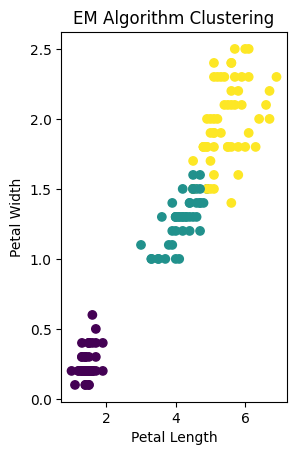

In [ ]:
# Plot the EM algorithm clustering result
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=y_gmm, cmap='viridis')
plt.title('EM Algorithm Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [ ]:
# Print the accuracy score and confusion matrix of the KMeans model
print('K-Means Accuracy Score: ', sm.accuracy_score(y, y_kmeans))
print('K-Means Confusion Matrix: \n', sm.confusion_matrix(y, y_kmeans))

K-Means Accuracy Score:  0.24
K-Means Confusion Matrix: 
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [ ]:
# Print the accuracy score and confusion matrix of the EM model
print('EM Accuracy Score: ', sm.accuracy_score(y, y_gmm))
print('EM Confusion Matrix: \n', sm.confusion_matrix(y, y_gmm))

EM Accuracy Score:  0.9666666666666667
EM Confusion Matrix: 
 [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


The Silhouette Score measures the similarity of each data point to its own cluster compared to other clusters.

The Homogeneity Score measures the similarity of clusters to a single class.

The Completeness Score measures the similarity of a class to a single cluster.

In [ ]:
# Print the clustering evaluation metrics
print('KMeans Clustering Results:')
print('Silhouette Score:', metrics.silhouette_score(X, y_kmeans))
print('Homogeneity Score:', metrics.homogeneity_score(y.Targets, y_kmeans))
print('Completeness Score:', metrics.completeness_score(y.Targets, y_kmeans))
print('\n')
print('EM Algorithm Clustering Results:')
print('Silhouette Score:', metrics.silhouette_score(X, y_gmm))
print('Homogeneity Score:', metrics.homogeneity_score(y.Targets, y_gmm))
print('Completeness Score:', metrics.completeness_score(y.Targets, y_gmm))

KMeans Clustering Results:
Silhouette Score: 0.5528190123564095
Homogeneity Score: 0.7514854021988339
Completeness Score: 0.7649861514489816


EM Algorithm Clustering Results:
Silhouette Score: 0.5011761635067206
Homogeneity Score: 0.8983263672602775
Completeness Score: 0.9010648908640206
